In [20]:

import yfinance as yf
import pandas as pd

msft = yf.Ticker("MSFT")
df = msft.history(period="3y")
df.reset_index(inplace=True)
df


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-02-16 00:00:00-05:00,238.621603,239.692840,236.566786,237.326385,26728500,0.00,0.0
1,2021-02-17 00:00:00-05:00,235.549896,238.468393,235.178977,238.361023,21653500,0.56,0.0
2,2021-02-18 00:00:00-05:00,236.018377,238.097437,235.100851,237.960785,16925600,0.00,0.0
3,2021-02-19 00:00:00-05:00,237.921764,238.029134,234.437118,235.208237,25262600,0.00,0.0
4,2021-02-22 00:00:00-05:00,231.743134,232.240934,226.843161,228.902710,36446900,0.00,0.0
...,...,...,...,...,...,...,...,...
749,2024-02-07 00:00:00-05:00,407.440002,414.299988,407.399994,414.049988,22340500,0.00,0.0
750,2024-02-08 00:00:00-05:00,414.049988,415.559998,412.529999,414.109985,21225300,0.00,0.0
751,2024-02-09 00:00:00-05:00,415.250000,420.820007,415.089996,420.549988,22012900,0.00,0.0
752,2024-02-12 00:00:00-05:00,420.559998,420.739990,414.750000,415.260010,21202900,0.00,0.0


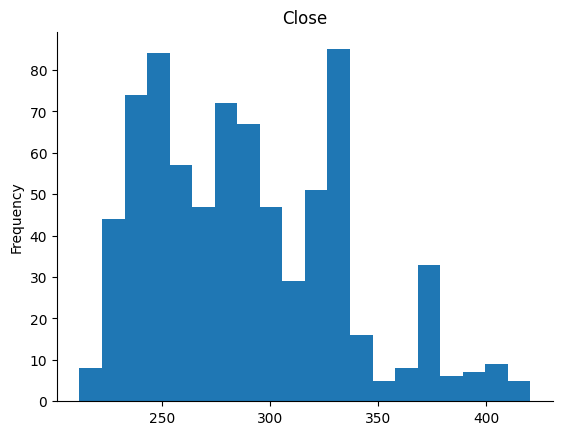

In [21]:
from matplotlib import pyplot as plt
df['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

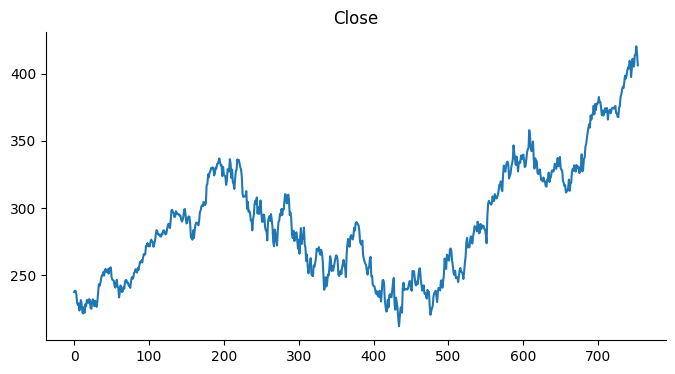

In [22]:

df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

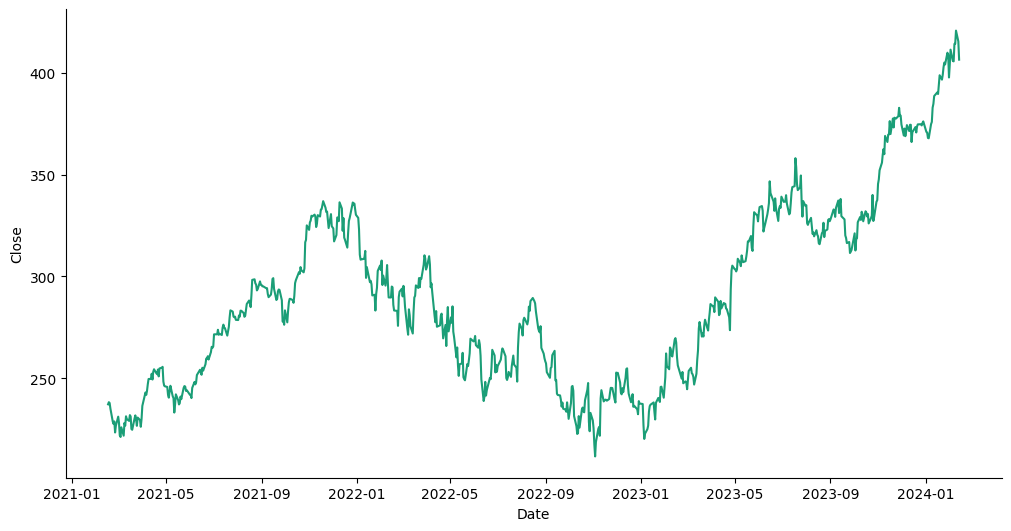

In [23]:

import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

In [25]:

df['Moving_Average'] = df['Close'].rolling(15).mean()
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Moving_Average
0,2021-02-16 00:00:00-05:00,238.621603,239.692840,236.566786,237.326385,26728500,0.00,0.0,NaN
1,2021-02-17 00:00:00-05:00,235.549896,238.468393,235.178977,238.361023,21653500,0.56,0.0,NaN
2,2021-02-18 00:00:00-05:00,236.018377,238.097437,235.100851,237.960785,16925600,0.00,0.0,NaN
3,2021-02-19 00:00:00-05:00,237.921764,238.029134,234.437118,235.208237,25262600,0.00,0.0,NaN
4,2021-02-22 00:00:00-05:00,231.743134,232.240934,226.843161,228.902710,36446900,0.00,0.0,NaN
...,...,...,...,...,...,...,...,...,...
749,2024-02-07 00:00:00-05:00,407.440002,414.299988,407.399994,414.049988,22340500,0.00,0.0,403.692664
750,2024-02-08 00:00:00-05:00,414.049988,415.559998,412.529999,414.109985,21225300,0.00,0.0,405.041996
751,2024-02-09 00:00:00-05:00,415.250000,420.820007,415.089996,420.549988,22012900,0.00,0.0,406.500661
752,2024-02-12 00:00:00-05:00,420.559998,420.739990,414.750000,415.260010,21202900,0.00,0.0,407.750661


<ipython-input-27-386313ef8659>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


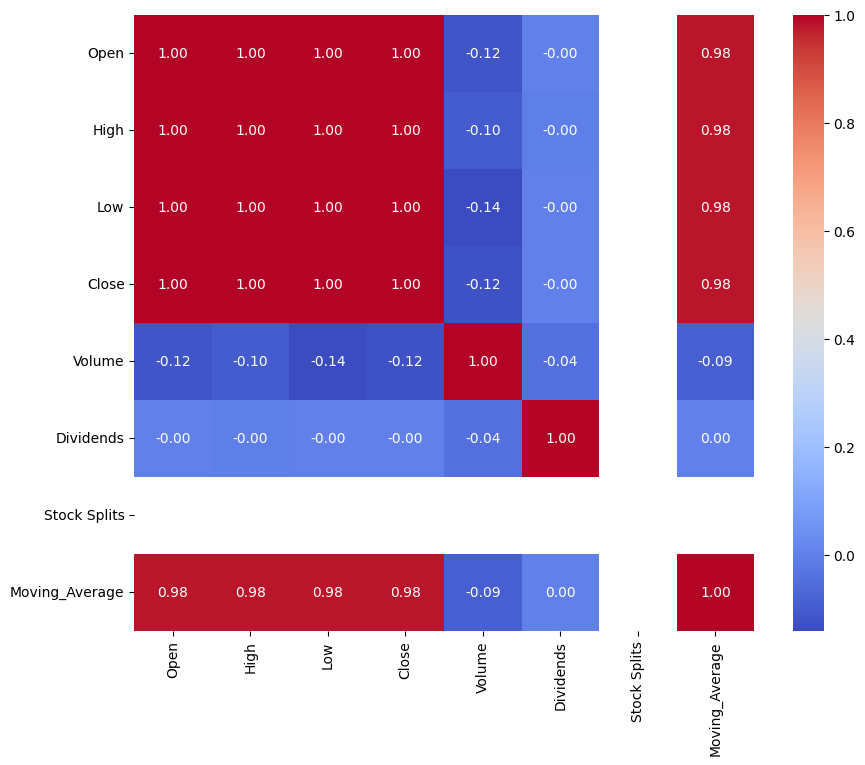

In [27]:

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [63]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.iloc[15:, 8].values.reshape(-1, 1)
y = df.iloc[15:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [64]:
y_pred = model.predict(X_test)

In [65]:

from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R-squared score(Accuracy): {r2}")


Mean squared error: 86.22277201351855
R-squared score(Accuracy): 0.9539385599392883


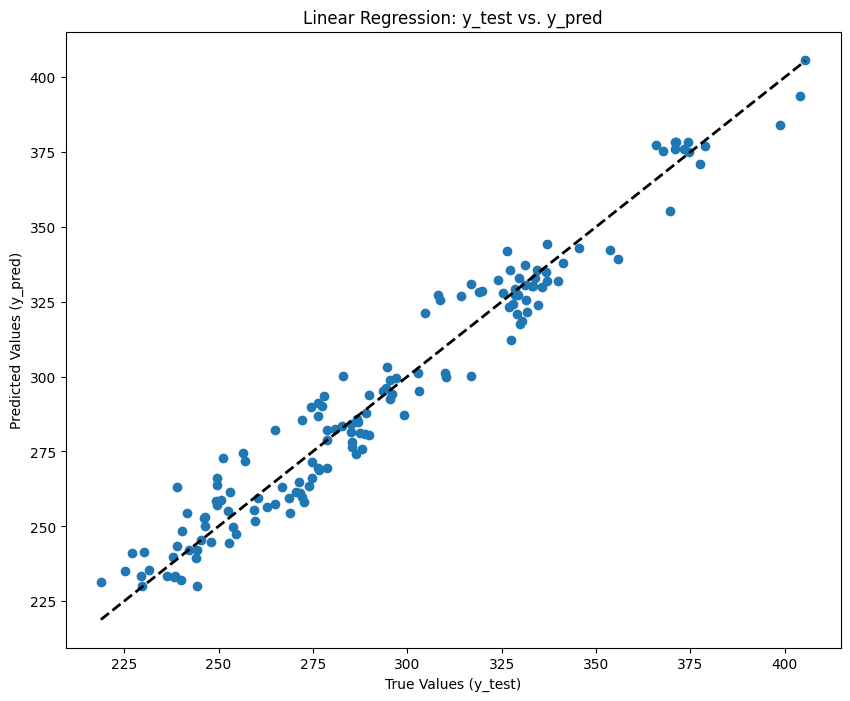

In [66]:

plt.figure(figsize=(10, 8))
plt.plot(y_test, y_pred, 'o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Linear Regression: y_test vs. y_pred')
plt.show()


In [67]:

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


Slope: 1.0180041562213553
Intercept: -3.4027068494141304


Mean squared error (SGD): 86.13886585520024
R-squared score(Accuracy) (SGD): 0.9539833838111247


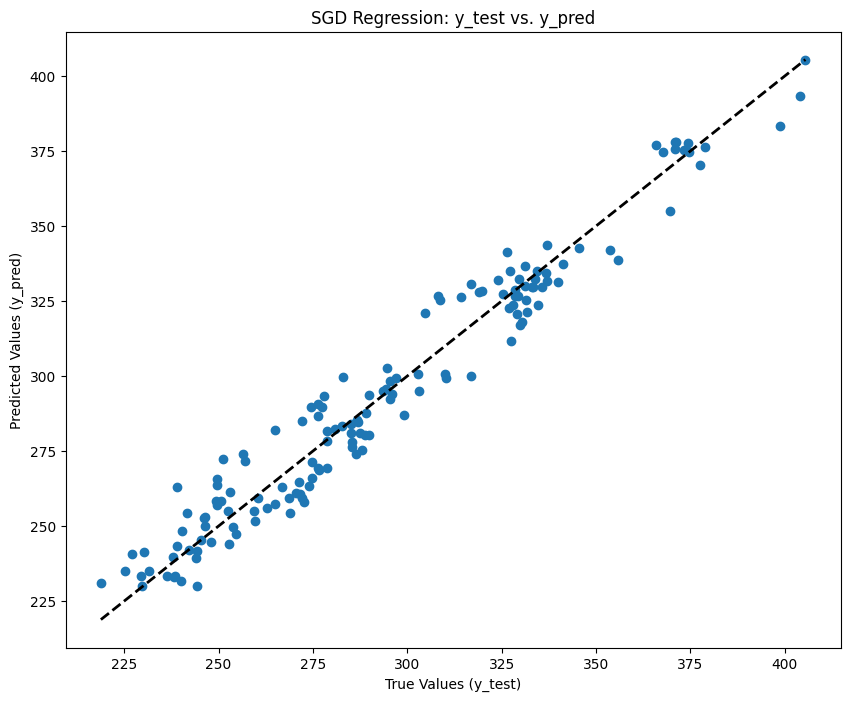

In [74]:

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_regressor.fit(X_train_scaled, y_train)

y_pred_sgd = sgd_regressor.predict(X_test_scaled)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print(f"Mean squared error (SGD): {mse_sgd}")
print(f"R-squared score(Accuracy) (SGD): {r2_sgd}")

plt.figure(figsize=(10, 8))
plt.plot(y_test, y_pred_sgd, 'o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('SGD Regression: y_test vs. y_pred')
plt.show()


In [76]:

slope = model.coef_
intercept = model.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


Slope: [-1.37937982e+12]
Intercept: [-5.27988678e+10]
